# Proyek Analisis Data: Bike-Sharing
- **Nama:** Nuryana Saepul Ramdan
- **Email:** nuryanasaepulramdan@gmail.com
- **ID Dicoding:** nuryanasaepulramdan

## Menentukan Pertanyaan Bisnis

- Berapa jumlah pengguna sepeda dalam setiap musim?
- Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda?
- Pada bulan apa jumlah pengguna sepeda tertinggi dan terendah?

## Import Semua Packages/Library yang Digunakan

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat tabel day

In [27]:
day_df = pd.read_csv("https://raw.githubusercontent.com/nsfis21/bike-sharing/refs/heads/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Pada proses ini, kita memuat semua data yang akan dianalisis.
- Dari tabel day pada dataset bike-sharing, kita memperoleh informasi mengenai indeks rekaman, tanggal, musim, tahun, hari kerja, hari libur, cuaca, kelembapan, kecepatan angin, bulan, pengguna kasual, terdaftar, dan total  pengguna sepeda.

### Assessing Data

Menilai Data day_df

In [28]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Menampilkan ringkasan parameter statistik dari data day_df

In [29]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dalam proses ini, ditemukan kesalahan tipe data dalam tabel dteday, yang memuat informasi mengenai tanggal dan tahun penyewaan sepeda.
- Sebelumnya, tabel dteday bertipe object, seharusnya datetime.

### Cleaning Data

Menangani kesalahan tipe data pada kolom dteday

In [30]:
datetime_columns = ["dteday"]
for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

In [31]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Pada tahap ini, kita memperbaiki setiap kesalahan dalam data.
- Pada dat diatas, kita memperbaiki kesalahan tipe data pada tabel dteday.

## Exploratory Data Analysis (EDA)

### Explorasi Data day_df

In [32]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Menampilkan jumlah pengguna sepeda untuk tiap kategori berdasarkan musim

In [33]:
day_df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
season,,,
1,60622,410726,471348
2,203522,715067,918589
3,226091,835038,1061129
4,129782,711831,841613


Menampilkan jumlah pengguna sepeda berdasarkan faktor cuaca, suhu, kelembapan, dan kecepatan angin.

In [34]:
day_df.groupby(by=["weathersit", "temp", "atemp", "hum", "windspeed"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

casual  registered   cnt
weathersit temp     atemp    hum      windspeed                          
1          0.059130 0.079070 0.400000 0.171970       93         888   981
           0.096522 0.098839 0.436522 0.246600      150         836   986
           0.097391 0.117930 0.491739 0.158330       86        1330  1416
           0.127500 0.101658 0.464583 0.409212       73        1456  1529
           0.138333 0.116175 0.434167 0.361950       54         768   822
...                                                 ...         ...   ...
3          0.543333 0.517717 0.906250 0.248150      217        2199  2416
           0.590833 0.542333 0.871667 0.104475      315        4324  4639
           0.595833 0.549912 0.865417 0.213300     1264        3195  4459
           0.599167 0.544229 0.917083 0.097021      118        1878  1996
           0.633913 0.555361 0.939565 0.192748      153        1689  1842

[731 rows x 3 columns]

Menampilkan hubungan antara jumlah pengguna sepeda berdasarkan kategori hari libur dan hari kerja

In [35]:
day_df.groupby(by=["holiday", "weekday", "workingday"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

casual  registered     cnt
holiday weekday workingday                            
0       0       0           140521      303506  444027
        1       1            54024      341874  395898
        2       1            57403      410693  468096
        3       1            54757      410888  465645
        4       1            59945      421530  481475
        5       1            77156      404140  481296
        6       0           153852      323955  477807
1       1       0            16760       42845   59605
        2       0              440         573    1013
        3       0             2562        4841    7403
        4       0             1515        2405    3920
        5       0             1082        5412    6494

Menampilkan jumlah pengguna sepeda untuk tiap-tiap bulan.

In [36]:
day_df.groupby(by="mnth").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
mnth,,,
1,12042,122891,134933
2,14963,136389,151352
3,44444,184476,228920
4,60802,208292,269094
5,75285,256401,331686
6,73906,272436,346342
7,78157,266791,344948
8,72039,279155,351194
9,70323,275668,345991


Menampilkan jumlah pengguna sepeda di tahun 2011 an 2012

In [37]:
day_df.groupby(by="yr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
yr,,,
0,247252,995851,1243103
1,372765,1676811,2049576


**Insight:**
- Pada tahap ini, kita mengeksplorasi data yang ada, untuk menemukan informasi menarik yang dapat di analisis.
- Pada data diatas, kita menganalisis informasi mengenai jumlah pengguna sepeda dari beberapa parameter yang tersedia, seperti bulan, musim, dan lain-lain.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa jumlah pengguna sepeda dalam setiap musim?

In [38]:
day_df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
season,,,
1,60622,410726,471348
2,203522,715067,918589
3,226091,835038,1061129
4,129782,711831,841613


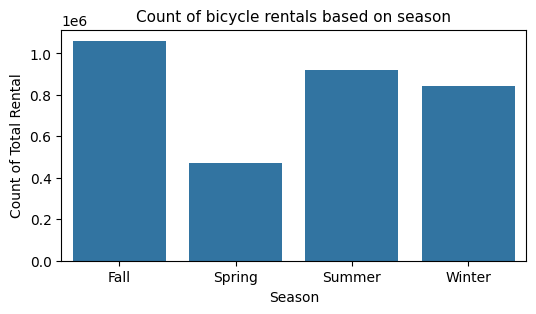

In [39]:
season_data = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
day_df["name_season"] = day_df["season"].map(season_data)
data_season= day_df.groupby("name_season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reset_index()
plt.figure(figsize=(6, 3))
sns.barplot(
    x="name_season", y="cnt", data=data_season)
plt.title("Count of bicycle rentals based on season", fontsize=11)
plt.ylabel("Count of Total Rental", fontsize=10)
plt.xlabel("Season", fontsize=10)
plt.show()

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda?

In [58]:
day_df.groupby(by="weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
weathersit,,,
1,446346,1811606,2257952
2,169776,827082,996858
3,3895,33974,37869


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


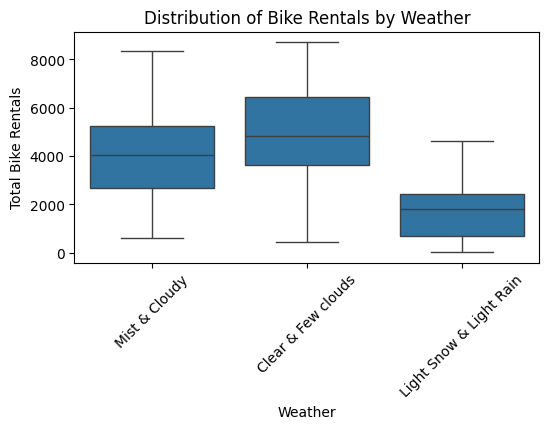

In [51]:
weather_data = {1:"Clear & Few clouds", 2:"Mist & Cloudy", 3:"Light Snow & Light Rain", 4:"Heavy Rain & Ice"}
day_df["name_weather"] = day_df["weathersit"].map(weather_data)
plt.figure(figsize=(6, 3))
sns.boxplot(x="name_weather", y="cnt", data=day_df)
plt.xlabel("Weather")
plt.ylabel("Total Bike Rentals")
plt.title("Distribution of Bike Rentals by Weather")
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 3: Pada bulan apa jumlah pengguna sepeda tertinggi dan terendah?



In [56]:
day_df.groupby(by="mnth").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
mnth,,,
1,12042,122891,134933
2,14963,136389,151352
3,44444,184476,228920
4,60802,208292,269094
5,75285,256401,331686
6,73906,272436,346342
7,78157,266791,344948
8,72039,279155,351194
9,70323,275668,345991


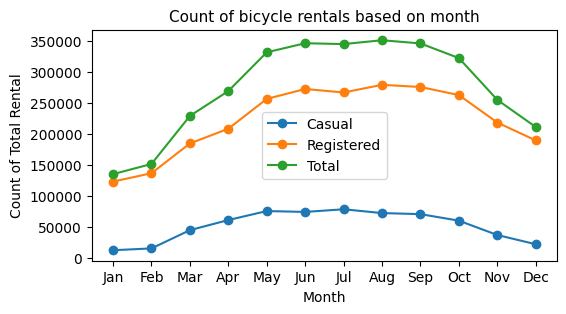

In [41]:
mnth_data = day_df.groupby("mnth").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reset_index()
mnths = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
mnth_data["mnth_name"] = mnths

plt.figure(figsize=(6, 3))
plt.plot(mnth_data["mnth_name"], mnth_data["casual"], label="Casual", marker = "o")
plt.plot(mnth_data["mnth_name"], mnth_data["registered"], label="Registered", marker = "o")
plt.plot(mnth_data["mnth_name"], mnth_data["cnt"], label="Total", marker = "o")
plt.title("Count of bicycle rentals based on month", fontsize=11)
plt.ylabel("Count of Total Rental", fontsize=10)
plt.xlabel("Month", fontsize=10)
plt.legend()
plt.show()

### Pertanyaan 4: Bagaimana pola sebaran pengguna sepeda di tahun 2011 dan 2012?

In [59]:
day_df.groupby(by="yr").agg({
    "cnt": "sum"
})

,cnt
yr,
0,1243103
1,2049576


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


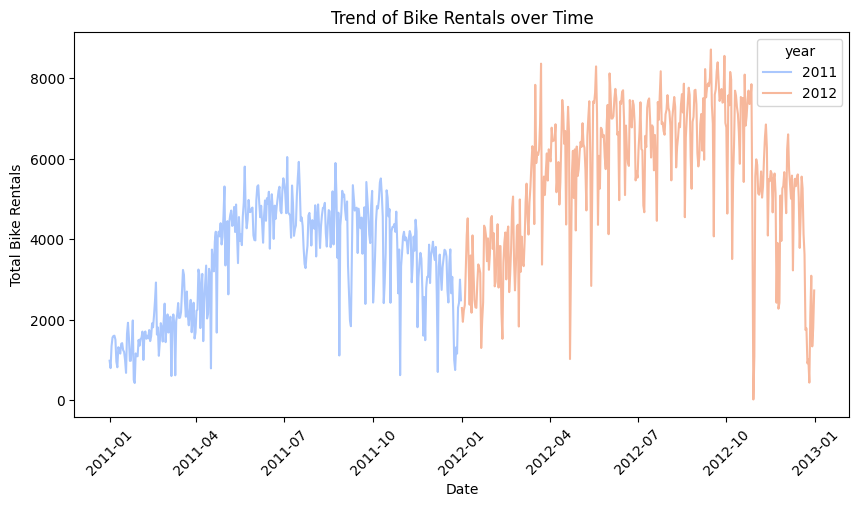

In [55]:
yr_label = {0: "2011", 1: "2012"}
day_df["year"] = day_df["yr"].map(yr_label)
data_yr = day_df.groupby("dteday").agg({
    "cnt": "sum"
}).reset_index()
plt.figure(figsize=(10, 5))
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
sns.lineplot(x="dteday", y="cnt", data=day_df, hue="year", palette="coolwarm")
plt.xlabel("Date")
plt.ylabel("Total Bike Rentals")
plt.title("Trend of Bike Rentals over Time")
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Pada tahap ini, kita melakukan eksplanasi data untuk menjawab semua pertanyaan bisnis yang telah diajukan.
- Kemudian kita melakukan visualisasi data untuk menampilkan hasil analisis dalam bentuk visual.

## Conclusion

- Jumlah pengguna sepeda paling banyak pada musim gugur, diikuti dengan musim panas, dingin, dan paling sedikit musim semi.
- Cuaca berpengaruh terhadap jumlah pengguna sepeda, rata-rata orang sewa sepeda pada saat cuaca cerah, sedikit berawan, dan berawan sebagian. Dari hasil analisis diatas, tidak ada orang yang bersepeda pada saat hujan lebat, badai petir, kabut, dan salju.
- Untuk pengguna kasual, jumlah pengguna sepeda tertinggi ada di bulan juli sedangkan terendah di bulan januari. Kemudian, untuk pengguna terdaftar, jumlah pengguna sepeda tertinggi ada di bulan agustus, sedangkan terendah di bulan januari. Terakhir, untuk pengguna sepeda secara total, pengguna tertinggi di bulan agustus, dan terendah di bulan januari.
- Trend penyewa sepeda tertinggi terjadi pada tahun 2012. Di kedua tahun tersebut, trend sewa sepeda meningkat di tengah bulan antara juni-september, kemudian menurun di setiap awal dan akhir bulan.